/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with Adam and loss function: sparse_categorical_crossentropy...
Epoch 1/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9277 - loss: 0.2539 - val_accuracy: 0.9592 - val_loss: 0.1383
Epoch 2/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9661 - loss: 0.1126 - val_accuracy: 0.9704 - val_loss: 0.0950
Epoch 3/5
1875/1875 - 12s - 6ms/step - accuracy: 0.9767 - loss: 0.0768 - val_accuracy: 0.9739 - val_loss: 0.0823
Epoch 4/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9825 - loss: 0.0573 - val_accuracy: 0.9759 - val_loss: 0.0754
Epoch 5/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9869 - loss: 0.0440 - val_accuracy: 0.9781 - val_loss: 0.0736
Training with SGD and loss function: sparse_categorical_crossentropy...
Epoch 1/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9936 - loss: 0.0252 - val_accuracy: 0.9813 - val_loss: 0.0614
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9948 - loss: 0.0219 - val_accuracy: 0.9815 - val_loss: 0.0600
Epoch 3/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9952 - loss: 0.020

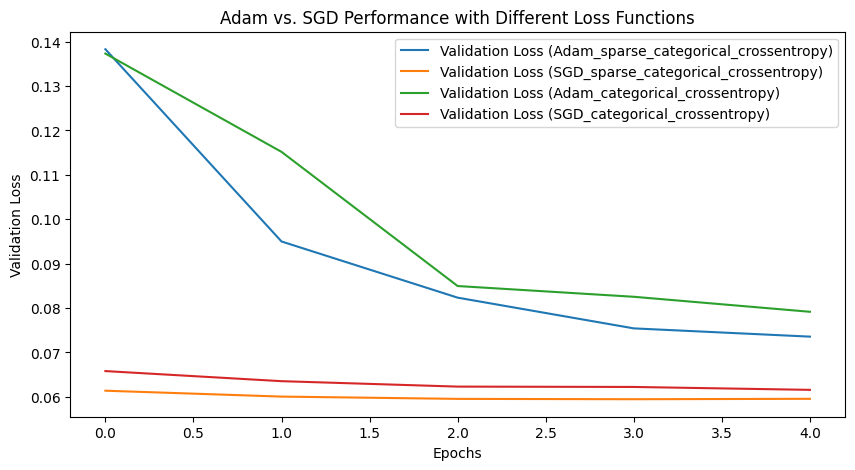

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Define loss functions
loss_functions = ["sparse_categorical_crossentropy", "categorical_crossentropy"]
history_dict = {}

for loss in loss_functions:
    # Define a new model inside the loop (to prevent errors)
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
        keras.layers.Dense(128, activation='relu'),  # Hidden layer
        keras.layers.Dense(10, activation='softmax') # Output layer (10 classes)
    ])

    # Convert labels to one-hot encoding if using categorical_crossentropy
    y_train_labels = keras.utils.to_categorical(y_train, num_classes=10) if loss == "categorical_crossentropy" else y_train
    y_test_labels = keras.utils.to_categorical(y_test, num_classes=10) if loss == "categorical_crossentropy" else y_test

 # Train models with Adam and SGD
    optimizers = {'Adam': tf.keras.optimizers.Adam(), 'SGD': tf.keras.optimizers.SGD()}

    for opt_name, optimizer in optimizers.items():
        model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        print(f"Training with {opt_name} and loss function: {loss}...")
        history = model.fit(x_train, y_train_labels, validation_data=(x_test, y_test_labels), epochs=5, batch_size=32, verbose=2)
        history_dict[f"{opt_name}_{loss}"] = history

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
for key, history in history_dict.items():
    plt.plot(history.history['val_loss'], label=f"Validation Loss ({key})")

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Adam vs. SGD Performance with Different Loss Functions')
plt.legend()
plt.show()


